<a href="https://colab.research.google.com/github/Alekhya39/ML-Assignment/blob/master/MLLAB8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Employee.csv', delimiter=',')
def encode(d):
    duplicate={
        'Yes': 1,
        'No': 0
    }
    return duplicate.get(d)

df['Attrition'] = df['Attrition'].apply(encode)
df['OverTime'] = df['OverTime'].apply(encode)
df.head()

Saving Employee.csv to Employee (1).csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
df_x = df[['JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction','OverTime','Age','TotalWorkingYears','YearsAtCompany','MonthlyIncome']]
df_y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state =0 )

In [8]:
#data preprocessing(Oversampling minority class)
X = pd.concat([X_train,y_train],axis=1)
X

,JobLevel,StockOptionLevel,JobSatisfaction,EnvironmentSatisfaction,OverTime,Age,TotalWorkingYears,YearsAtCompany,MonthlyIncome,Attrition
338,2,3,3,4,0,30,10,10,6118,0
363,1,0,3,4,1,33,1,1,2851,1
759,1,0,2,2,0,45,6,6,2177,0
793,1,1,3,1,0,28,4,4,2207,0
581,1,2,3,4,0,30,7,2,3833,0
...,...,...,...,...,...,...,...,...,...,...
763,1,1,3,3,1,34,1,1,2220,0
835,1,0,3,3,0,35,6,5,4323,0
1216,2,1,4,4,1,43,10,10,7847,0
559,1,1,3,4,1,38,6,1,3057,0


In [0]:
y_a = X[X.Attrition == 1]
n_a = X[X.Attrition == 0]

In [10]:
y_a_s = resample(y_a, replace=True, n_samples=len(n_a), random_state=0)
df_s = pd.concat([y_a_s, n_a])
df_s_x = df_s.drop(['Attrition'], axis=1)
df_s_y = df_s.Attrition
df_s['Attrition'].value_counts()/1724*100   

1    50.0
0    50.0
Name: Attrition, dtype: float64

In [11]:
#Logistic regression with over sampled data
X_train, X_test,y_train, y_test = train_test_split(df_s_x,df_s_y, test_size=0.3, random_state=0)
log_reg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       269
           1       0.75      0.69      0.72       249

    accuracy                           0.74       518
   macro avg       0.74      0.74      0.74       518
weighted avg       0.74      0.74      0.74       518



In [12]:
cvs = cross_val_score(log_reg,df_s_x, df_s_y, cv=10, scoring='accuracy')
cvs.mean()*100

71.39870950396559

In [13]:
#KNN with oversampled data
knn = KNeighborsClassifier().fit(X_train, y_train)
y_predi = knn.predict(X_test)
accuracy_score(y_predi, y_test)*100

78.18532818532819

In [14]:
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       269
           1       0.72      0.90      0.80       249

    accuracy                           0.78       518
   macro avg       0.80      0.79      0.78       518
weighted avg       0.80      0.78      0.78       518



In [15]:
cvs_knn = cross_val_score(knn, df_s_x, df_s_y, scoring ='accuracy', cv=10)
cvs_knn.mean()*100

78.54281489447506

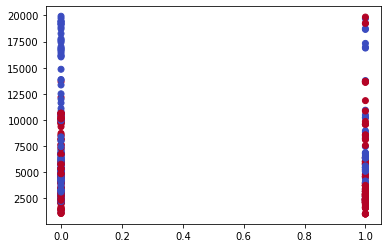

In [16]:
plt.scatter(X_test['OverTime'], X_test['MonthlyIncome'], c=y_predi, cmap='coolwarm')

In [17]:
#hyper parameter tuning(Gridsearch cv)
p = np.logspace(-5,8,18)
param_grid = {"C" : p}
logreg_CV = GridSearchCV(log_reg, param_grid, cv=5)
logreg_CV.fit(X_train, y_train)
logreg_CV.best_params_

{'C': 17190722.01858571}

In [18]:
logreg_CV.best_score_*100

71.05894859572717

In [19]:
paramgrid = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform','distance'],
    'metric' :['euclidean','manhattan']
}
knn_CV = GridSearchCV(knn, paramgrid, cv=3, verbose=1, n_jobs = -1)
knn_CV.fit(X_train, y_train)
knn_CV.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.9s finished


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [20]:
knn_CV.best_score_*100

81.17744610281925

In [21]:
#hyper parameter tuning(Randomized search cv)
logreg_CV2 = RandomizedSearchCV(log_reg, param_grid, cv=5)
logreg_CV2.fit(X_train, y_train)
logreg_CV2.best_params_
logreg_CV2.best_estimator_

LogisticRegression(C=15013.107289081712, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logreg_CV2.best_score_*100

70.80998594012551

In [23]:
knn_CV2 = RandomizedSearchCV(knn, paramgrid, cv=3, verbose=1, n_jobs = -1)
knn_CV2.fit(X_train, y_train)
knn_CV2.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [24]:
knn_CV2.best_score_*100

81.17744610281925